<h1> <center> Đồ án 2: Image Processing </center> </h1>
<h2> <center> MSSV: 21127202  - Họ và tên: Trần Minh Hải Uyên </center> </h2>

<h2> I. Các hàm phụ hỗ trợ <h2>

<b> - Hàm đọc thông tin hình ảnh và lưu trữ dưới dạng ma trận numpy </b>

In [ ]:
def Input(ImageName): 
    img = Image.open(ImageName)
    numpydata = asarray(img)
    return numpydata

<b> - Hàm chuyển từ ma trận 3 chiều thành 2 chiều và ngược lại </b>

In [ ]:
def Reshaping2d(img_3d):
    img_shape = img_3d.shape
    img_2d = img_3d.reshape(img_shape[0]*img_shape[1],img_shape[2])
    return img_2d

def Reshaping3d(img_2d,shape_3d):
    img_3d = img_2d.reshape((shape_3d[0],shape_3d[1],shape_3d[2]))
    img_3d = np.array(img_3d.astype(np.uint8))
    return img_3d

<b> - Hàm hiển thị ảnh và lưu ảnh dưới dạng png </b>

In [ ]:
def Output(numpydata,FileName,Feature):
    FinalName = FileName[0] + '_' + Feature + '.png'
    data = Image.fromarray(numpydata)
    data.save(FinalName)
    plt.imshow(numpydata)
    plt.show()

<h2> II. Các chức năng chính </h2>

<h3> 1. Thay đổi độ sáng cho ảnh </h3>

<b> - Hàm Limitation_Adds</b>
Nhận vào một mảng 2 chiều img_2d và một giá trị values, sau đó giới hạn giá trị lớn nhất của mảng bằng cách thêm giá trị values vào từng phần tử của mảng. Nếu tổng của phần tử và giá trị values lớn hơn hoặc bằng 255, thì giá trị của phần tử đó sẽ được đặt bằng 255. Ngược lại, giá trị của phần tử đó sẽ được cộng thêm với giá trị values. Hàm này trả về một mảng mới có cùng kích thước với mảng ban đầu.

In [ ]:
def Limitation_Adds(img_2d,values): #Limit the highest num
    shape = img_2d.shape
    lim = 255 - values
    adds = np.full_like(img_2d,0,dtype = np.uint8)
    for i in range(shape[0]):
        for j in range(shape[1]):
            if (img_2d[i][j] + values) >= lim:
                adds[i][j] = lim
            else:
                adds[i][j] = adds[i][j] + img_2d[i][j] + values
    return adds

<b>- Hàm Brighten:</b>
Hàm này sử dụng hàm Limitation_Adds để tăng độ sáng của ảnh, sau đó chuyển đổi mảng 2 chiều thành một mảng 3 chiều bằng cách sử dụng hàm Reshaping3d. Cuối cùng, hàm này xuất ra ảnh đã được tăng độ sáng bằng cách sử dụng hàm Output. Hàm này cũng in ra thời gian thực thi của quá trình tăng độ sáng.

In [ ]:
def Brighten(shape_3d,img_2d,FileName):
    start = time.time()
    values = 40
    adds = Limitation_Adds(img_2d,values)
    img_3d = Reshaping3d(adds,shape_3d)
    end = time.time()
    print("Excution time_Brighten: ",end-start)
    Output(img_3d,FileName,'brighten')

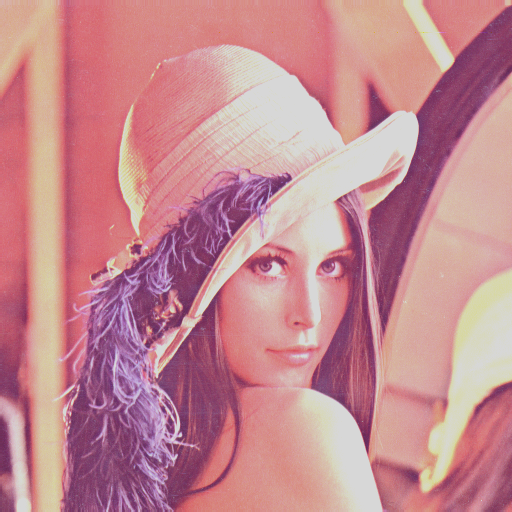

<h3> 2. Thay đổi độ tương phản </h3>

<b> - Hàm Contrast:</b>
Hàm này sử dụng giá trị tương phản contrast_val để tính toán giá trị nhỏ nhất Minn và giá trị lớn nhất Maxx của hình ảnh. contrast_val có thể điều chỉnh được, contrast_val càng lớn độ tương phản của hình ảnh càng cao.
Sau đó, hàm này sử dụng hàm np.clip để giới hạn giá trị của các phần tử trong mảng img_2d trong khoảng từ Minn đến Maxx. Tiếp theo, hàm này tính toán giá trị mới cho các phần tử trong mảng bằng cách chia cho khoảng cách giữa Maxx và Minn, sau đó nhân với 245 và cộng thêm 10.

In [ ]:
def Contrast(shape_3d,img_2d,FileName):
    start = time.time()
    contrast_val = 50
    Minn = np.min(img_2d) + contrast_val
    Maxx = np.max(img_2d) - contrast_val
    adds = np.full_like(img_2d,0,dtype = np.uint8)
    img_2d = (np.clip(img_2d,Minn,Maxx) - Minn)/(Maxx - Minn)
    adds = (img_2d*(255-10)) + 10
    img_3d = Reshaping3d(adds,shape_3d)
    end = time.time()
    print("Excution time_Contrast: ",end-start)
    Output(img_3d,FileName,'contrast') 

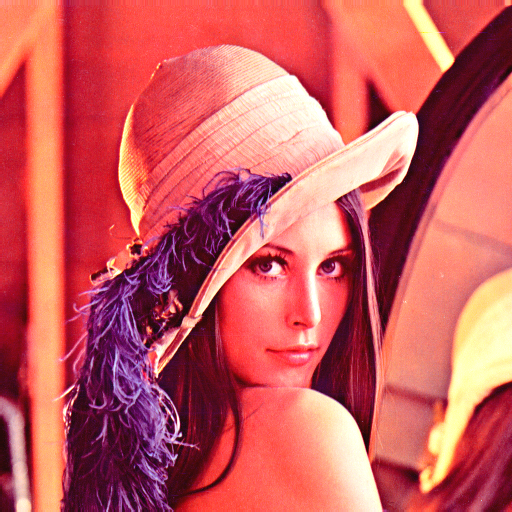

<h3> 3. Lật ảnh (ngang - dọc) </h3>

<b> - Hàm Flip: </b>
Hàm np.flip được sử dụng để đảo ngược thứ tự các phần tử trong một mảng theo trục được chỉ định. Hình dạng của mảng được giữ nguyên, nhưng các phần tử được sắp xếp lại1. Tham số đầu tiên của hàm là mảng cần đảo ngược, tham số thứ hai là trục hoặc các trục cần đảo ngược.Nếu Choice bằng 1, hàm sẽ lật ảnh theo chiều dọc bằng cách sử dụng hàm np.flip với tham số axis=0. Nếu Choice bằng 2, hàm sẽ lật ảnh theo chiều ngang bằng cách sử dụng hàm np.flip với tham số axis=1. 

In [ ]:
def Flip(Choice,img_3d,FileName):
    start = time.time()
    adds = np.copy(img_3d)
    if Choice == 1:
        adds = np.flip(adds,0)
        end = time.time()
        print("Excution time_Flip Vertically: ",end-start)
        Output(adds,FileName,'flip_vertically')
    elif Choice == 2:
        adds = np.flip(adds,1)
        end = time.time()
        print("Excution time_Flip Horizontally: ",end-start)
        Output(adds,FileName,'flip_horizontally')

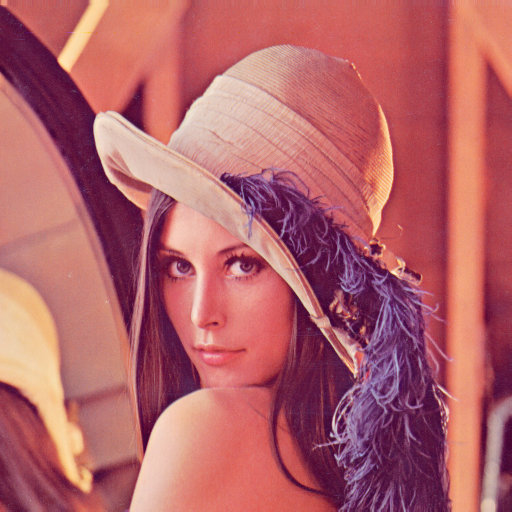

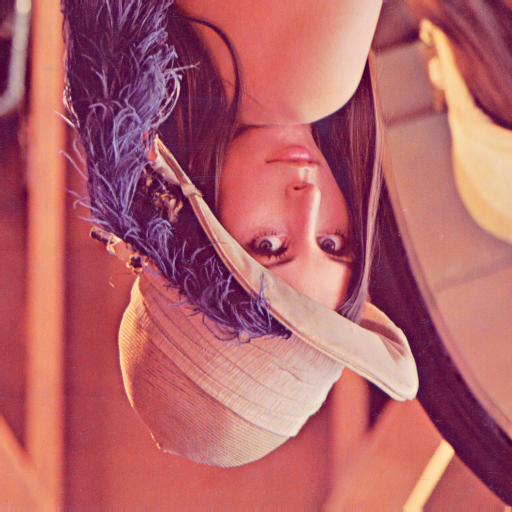

<h3> 4. Chuyển đổi ảnh RGB thành ảnh xám/sepia </h3>

<b>- Hàm rgb2gray: </b> 
Nhận vào một tuple rgb chứa ba giá trị màu đỏ, xanh lá cây, và xanh dương của một điểm ảnh. Hàm này sử dụng công thức để tính toán giá trị màu xám cho điểm ảnh đó bằng cách nhân giá trị màu đỏ với 0.2989, giá trị màu xanh lá cây với 0.5870, và giá trị màu xanh dương với 0.1140, sau đó cộng lại. Hàm này trả về một tuple chứa ba giá trị màu xám giống nhau.

In [ ]:
def rgb2gray(rgb):
    grey = rgb[0]*0.2989+rgb[1]*0.5870+rgb[2]*0.1140
    return (grey,grey,grey)

<b> - Hàm rgb2sepia: </b>
Hàm này sử dụng công thức để tính toán giá trị màu sepia cho điểm ảnh đó bằng cách nhân giá trị màu đỏ, màu xanh lá cây, màu xanh dương với các hệ số khác nhau, sau đó cộng lại. Nếu giá trị màu mới lớn hơn 255, thì nó sẽ được đặt bằng 255. Hàm này trả về một tuple chứa ba giá trị màu sepia mới.

In [ ]:
def rgb2sepia(rgb):
    tr = 0.393*rgb[0] + 0.769*rgb[1] + 0.189*rgb[2]
    if tr > 255:
        tr = 255
    tg = 0.349*rgb[0] + 0.686*rgb[1] + 0.168*rgb[2]
    if tg > 255:
        tg = 255
    tb = 0.272*rgb[0] + 0.534*rgb[1] + 0.131*rgb[2]
    if tb > 255:
        tb = 255
    return (tr,tg,tb)

<b> - Hàm GreyscaleSepia: </b>
Với từng pixel, thông qua 2 hàm trên để cho ra một giá trị mới cho từng điểm ảnh theo công thức màu.

In [ ]:
def GreyscaleSepia(shape_3d,img_2d,FileName):
    start = time.time()
    #Grey scale
    shape = img_2d.shape
    grey = np.full_like(img_2d,0,dtype = np.uint8)
    for i in range(shape[0]):
        grey[i] = rgb2gray(img_2d[i])
    img_3d_gc = Reshaping3d(grey,shape_3d)
    #Sepia
    sepia = np.full_like(img_2d,0,dtype = np.uint8)
    for i in range(shape[0]):
        sepia[i] = rgb2sepia(img_2d[i])
    img_3d_sp = Reshaping3d(sepia,shape_3d)
    end = time.time()
    print("Excution time_Grayscale Sepia: ",end-start)
    Output(img_3d_gc,FileName,'greyscale')
    Output(img_3d_sp,FileName,'sepia')

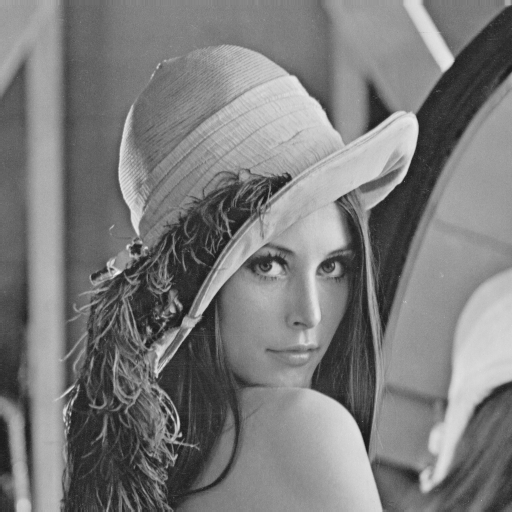

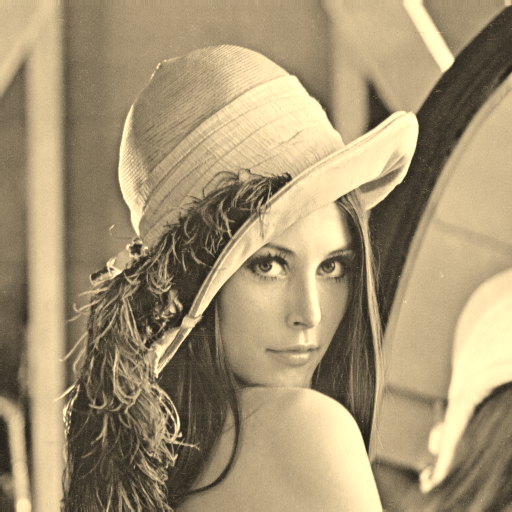

<h3> 5. Làm mờ/sắc nét ảnh </h3>

<b> - Hàm BoxBlur: </b>
Hàm sử dụng phương pháp Box Blur để làm mờ ảnh.
Kernel là một ma trận nhỏ được sử dụng để áp dụng các hiệu ứng khác nhau lên ảnh thông qua phép tích chập. Trong trường hợp này, kernel được định nghĩa là một ma trận kích thước kernel_size x kernel_size, với tất cả các phần tử đều bằng 1 chia cho bình phương của kernel_size.

kernel_size có thể thay đổi giá trị, chỉ nhận giá trị số lẻ, vì chỉ ma trận số lẻ mới xác định được điểm trung tâm của ma trận. kernel_size càng tăng thì độ mờ của ảnh càng cao.

Ví dụ: 
* Với kernel_size bằng 3, thì kernel sẽ có dạng:

[[1/9, 1/9, 1/9],

 [1/9, 1/9, 1/9],
 
 [1/9, 1/9, 1/9]]
 
* Với kernel_size bằng 5, thì kernel sẽ có dạng:

[[1/25, 1/25, 1/25, 1/25, 1/25],

 [1/25, 1/25, 1/25, 1/25, 1/25],
 
 [1/25, 1/25, 1/25, 1/25, 1/25],
 
 [1/25, 1/25, 1/25, 1/25, 1/25],
 
 [1/25, 1/25, 1/25, 1/25, 1/25]]
 
Bằng cách tính trung bình cộng của các giá trị màu trong một cửa sổ kích thước kernel_size x kernel_size xung quanh mỗi điểm ảnh, kết quả nhận được là một ảnh mới với các chi tiết bị làm mờ và mịn hơn.

In [ ]:
def BoxBlur(image, FileName):
    start = time.time()
    kernel_size = 3 #odd number to define center in the kernel
    # Define the box kernel
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    num_channels = image.shape[2]
    blurred_image = np.zeros_like(image)
    for channel in range(num_channels):
        padding = kernel_size // 2
        padded_channel = np.pad(image[:, :, channel], ((padding, padding), (padding, padding)), mode="constant")
        for i in range(padding, image.shape[0] + padding):
            for j in range(padding, image.shape[1] + padding):
                window = padded_channel[i - padding : i + padding + 1, j - padding : j + padding + 1]
                blurred_image[i - padding, j - padding, channel] = int(np.sum(window * kernel))
    blurred_image = blurred_image.astype(np.uint8)
    end = time.time()
    print("Excution time_Box Blur: ",end-start)
    Output(blurred_image,FileName,'boxblur_'+str(kernel_size)+'kernelsize')

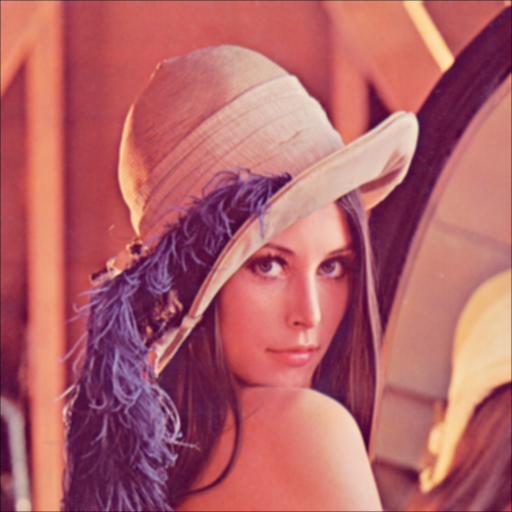

<b> - Hàm sharpen: </b>

Kernel được sử dụng để làm sắc nét ảnh. Kernel được định nghĩa là một ma trận 3x3, với các phần tử ở giữa bằng 1 cộng với 4 lần giá trị factor, các phần tử ở cạnh bằng âm giá trị factor, và các phần tử ở góc bằng 0.
Kernel này được sử dụng để làm sắc nét các chi tiết trong ảnh bằng cách tăng cường độ tương phản giữa các điểm ảnh lân cận.

Ví dụ:
* Nếu factor bằng 1.0, thì kernel sẽ có dạng:

[[0, -1, 0],

 [-1, 5, -1],
 
 [0, -1, 0]]
 
* Nếu factor bằng 2.0, thì kernel sẽ có dạng:

[[0, -2, 0],

 [-2, 9, -2],
 
 [0, -2, 0]]

Factor là một tham số quan trọng trong hàm này, nhận giá trị số thập phân và có thể thay đổi. Nó quyết định mức độ làm sắc nét của ảnh. Giá trị factor càng lớn, mức độ làm sắc nét của ảnh càng cao. Tuy nhiên, nếu giá trị factor quá lớn, ảnh có thể bị biến dạng và xuất hiện nhiễu.

Hàm này duyệt qua từng kênh màu của ảnh và từng điểm ảnh của kênh. Tại mỗi điểm ảnh, hàm lấy ra cửa sổ kích thước 3x3 xung quanh điểm ảnh đó, sau đó nhân ma trận cửa sổ với kernel và cộng lại để tính toán giá trị mới cho điểm ảnh. Giá trị mới này được giới hạn trong khoảng từ 0 đến 255 bằng cách sử dụng hàm np.clip. Kết quả là một ảnh mới với các chi tiết rõ ràng hơn.

In [ ]:
def Sharpen(image, FileName):
    start = time.time()
    factor = 1.0
    # Define the sharpening kernel
    kernel = np.array([[0, -factor, 0],
                       [-factor, 1 + 4*factor, -factor],
                       [0, -factor, 0]])

    num_channels = image.shape[2]

    sharpened_image = np.zeros_like(image)
    for channel in range(num_channels):
        for i in range(1, image.shape[0] - 1):
            for j in range(1, image.shape[1] - 1):
                window = image[i - 1 : i + 2, j - 1 : j + 2, channel]
                sharpened_value = np.sum(window * kernel)
                sharpened_image[i, j, channel] = np.clip(sharpened_value, 0, 255)
    end = time.time()
    print("Excution time_Sharpen: ",end-start)
    Output(sharpened_image,FileName,'sharpen_'+str(factor)+'factor')

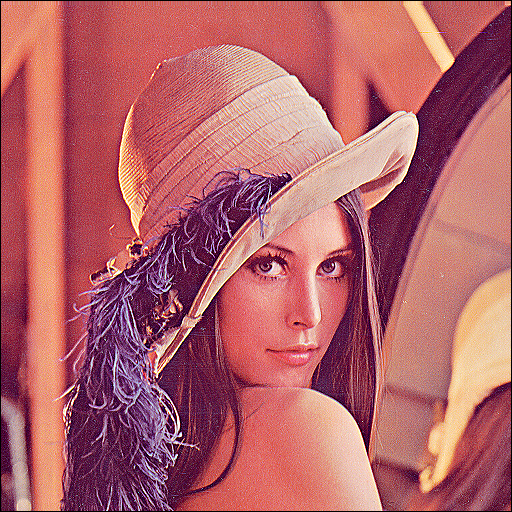

<h3> 6. Cắt ảnh theo kích thước (cắt ở trung tâm) </h3>

<b> - Hàm crop: </b>
Hàm này tính toán chiều cao và chiều rộng mới cho ảnh bằng cách nhân chiều cao và chiều rộng ban đầu với tỷ lệ cắt. Sau đó, hàm tính toán tọa độ trên, dưới, trái, và phải của vùng cắt bằng cách lấy giá trị trung bình của chiều cao và chiều rộng ban đầu trừ đi chiều cao và chiều rộng mới. Cuối cùng, hàm trích xuất vùng cắt từ mảng ảnh ban đầu và trả về mảng ảnh đã được cắt.

Ví dụ:
* Với một ảnh có kích thước 512x512 và tỷ lệ cắt là 0.5, hàm crop sẽ tính toán chiều cao và chiều rộng mới cho ảnh là 256 (512 * 0.5). Sau đó, hàm sẽ tính toán tọa độ trên, dưới, trái, và phải của vùng cắt là 128 ((512 - 256) // 2), 384 (128 + 256), 128 ((512 - 256) // 2), và 384 (128 + 256). Cuối cùng, hàm sẽ trích xuất vùng cắt từ mảng ảnh ban đầu và trả về một mảng ảnh mới có kích thước 256x256.

In [ ]:
def crop(image_array, crop_ratio):
    image_height, image_width, _ = image_array.shape
    crop_height = int(image_height * crop_ratio)
    crop_width = int(image_width * crop_ratio)

    top = (image_height - crop_height) // 2
    left = (image_width - crop_width) // 2
    bottom = top + crop_height
    right = left + crop_width
    cropped_image_array = image_array[top:bottom, left:right, :]
    return cropped_image_array

<b> - Hàm resize: </b>
Hàm này tạo ra một mảng mới có kích thước bằng với kích thước đích và kiểu dữ liệu giống với mảng ảnh ban đầu. Sau đó, hàm duyệt qua từng điểm ảnh của mảng mới và tính toán tọa độ tương ứng của điểm ảnh đó trong mảng ảnh ban đầu bằng cách nhân tọa độ hiện tại với tỷ lệ giữa kích thước ban đầu và kích thước đích. Cuối cùng, hàm gán giá trị của điểm ảnh trong mảng mới bằng giá trị của điểm ảnh tương ứng trong mảng ảnh ban đầu và trả về mảng ảnh đã được thay đổi kích thước.

Ví dụ: 
* Tiếp tục lấy ví dụ của hàm crop, ta muốn chuyển hình đã cắt có kích thước 256x256 về hình ban đầu 512x512. Mỗi điểm ảnh của mảng mới sẽ tương ứng với một điểm ảnh trong mảng ảnh ban đầu, được tính toán bằng cách nhân tọa độ hiện tại với tỷ lệ giữa kích thước ban đầu và kích thước đích. Ví dụ, điểm ảnh tại tọa độ (0, 0) trong mảng mới sẽ tương ứng với điểm ảnh tại tọa độ (0, 0) trong mảng ban đầu, điểm ảnh tại tọa độ (256, 256) trong mảng mới sẽ tương ứng với điểm ảnh tại tọa độ (128, 128) trong mảng ban đầu.

In [ ]:
def resize(image_array, target_size):
    # target_size: Tuple (width, height)
    width, height = target_size
    resized_image_array = np.zeros((height, width, image_array.shape[2]), dtype=image_array.dtype)
    for y in range(height):
        for x in range(width):
            original_x = int(x / width * image_array.shape[1])
            original_y = int(y / height * image_array.shape[0])
            resized_image_array[y, x] = image_array[original_y, original_x]
    return resized_image_array

<b> - Hàm CropImage: </b>
Hàm này sử dụng hàm crop để cắt ảnh theo tỷ lệ crop_ratio, sau đó sử dụng hàm resize để thay đổi kích thước của ảnh đã cắt về kích thước ban đầu.

crop_ratio là tỉ lệ cắt ảnh, nhận giá trị số thập phân từ 0.0 tới 1.0, tương ứng với ảnh được crop sẽ bằng bao nhiêu % ảnh gốc.

In [ ]:
def CropImage(image_array, FileName):
    start = time.time()
    crop_ratio = 0.5 # crop_ratio: Tỉ lệ cắt ảnh (0.0 - 1.0)
    #crop image from center
    cropped_image_array = crop(image_array, crop_ratio)
    # resize to the original size
    target_size = (image_array.shape[1], image_array.shape[0])
    resized_image_array = resize(cropped_image_array, target_size)
    end = time.time()
    print("Excution time_Crop Image: ",end-start)
    Output(resized_image_array,FileName,'crop_'+str(crop_ratio*100)+'%')

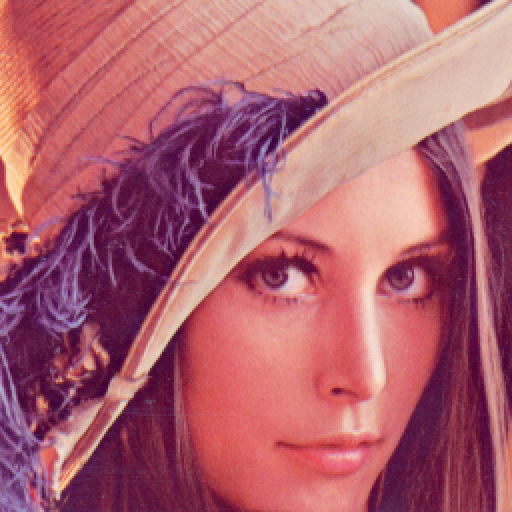

<h3> 7. Cắt ảnh theo khung hình tròn </h3>

<b> - Hàm CircleFrame: </b>
Hàm này tạo ra một khung hình tròn cho ảnh bằng cách sử dụng mặt nạ. Mặt nạ được tạo ra bằng cách sử dụng hàm np.ogrid để tạo ra hai mảng tọa độ x và y, sau đó tính toán khoảng cách từ mỗi điểm ảnh đến tâm của ảnh. Nếu khoảng cách nhỏ hơn hoặc bằng bán kính, thì giá trị của mặt nạ tại điểm ảnh đó sẽ là 1 (True), ngược lại sẽ là 0 (False). Sau đó, hàm sử dụng toán tử ~ để đảo ngược giá trị của mặt nạ, sau đó áp dụng lên mảng ảnh ban đầu để đổi màu các điểm ảnh ngoài vùng bán kính thành màu đen.

Hàm np.ogrid là một hàm trả về hai mảng lưới có kích thước khác nhau, được sử dụng để tính toán các phép toán trên ma trận một cách hiệu quả. Trong trường hợp này, hàm np.ogrid được sử dụng để tạo ra hai mảng tọa độ x và y cho mỗi điểm ảnh trong ảnh.

Mask là một mảng boolean có cùng kích thước với ảnh, được sử dụng để chọn lọc các điểm ảnh cần xử lý. Trong trường hợp này, mask được sử dụng để chọn lọc các điểm ảnh nằm trong phạm vi bán kính của khung hình tròn. Các điểm ảnh nằm trong phạm vi bán kính sẽ có giá trị True trong mặt nạ, còn các điểm ảnh ngoài phạm vi bán kính sẽ có giá trị False.

Toán tử ~ được sử dụng để đảo ngược giá trị của một mảng boolean. Nếu một phần tử của mảng có giá trị True, thì sau khi đảo ngược, giá trị của nó sẽ thành False, và ngược lại. Trong trường hợp này, toán tử ~ được sử dụng để đảo ngược giá trị của mặt nạ, từ đó chọn lọc các điểm ảnh ngoài phạm vi bán kính để đổi màu thành màu đen

In [ ]:
def CircleFrame(image_array, Filename):
    start = time.time()
    color=(0, 0, 0)
    (width, height) = (image_array.shape[0],image_array.shape[1])
    radius = width//2
    center_x = width // 2
    center_y = height // 2
    # Tạo mặt nạ hình tròn với các giá trị 1 (True) trong phạm vi bán kính và các giá trị 0 (False) ngoài phạm vi bán kính
    y, x = np.ogrid[:height, :width]
    mask = (x - center_x)**2 + (y - center_y)**2 <= radius**2
    # Chuyển đổi hình ảnh sang numpy array
    # Áp dụng mặt nạ lên hình ảnh gốc
    masked_image = np.copy(image_array)
    masked_image[~mask] = color
    end = time.time()
    print("Excution time_Circle Frame: ",end-start)
    Output(masked_image, FileName, 'circleframe')

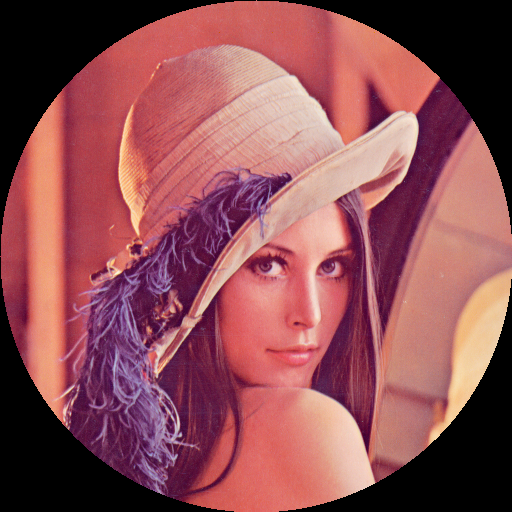

<h3> 8. Hàm main xử lý </h3>

- Cho phép người dùng nhập vào tên tập tin ảnh mỗi khi hàm main được thực thi.
- Cho phép người dùng lựa chọn chức năng xử lý ảnh (từ 1 đến 7, đối với chức năng 4 cho phép lựa chọn giữa lật ngang hoặc lật dọc). Lựa chọn 0 cho phép thực hiện tất cả chức năng với tên file đầu ra tương ứng với từng chức năng.
- Trong từng hàm đã có hàm tính thời gian của từng chức năng (theo giây)

In [ ]:
def Feature():
    print("0. All the feature below")
    print("1. Brighten image")
    print("2. Adjust contrast")
    print("3. Flip image")
    print("4. RBG to BNW or Sepia")
    print("5. Blur/sharpen image")
    print("6. Crop image from center")
    print("7. Circle frame")
    print("8. 2 ellipse frame")
    return (int(input("Your choice: ")))

In [ ]:
if __name__ == "__main__":
    ImageName = input("Please enter the input name of a file: ")
    img_3d = Input(ImageName)
    shape_3d = img_3d.shape
    img_2d = Reshaping2d(img_3d)
    FileName = ImageName.split('.')
    Choice = Feature()
    if Choice == 0:
        Brighten(shape_3d,img_2d,FileName)
        Contrast(shape_3d,img_2d,FileName)
        Flip(1,img_3d,FileName)
        Flip(2,img_3d,FileName)
        GreyscaleSepia(shape_3d,img_2d,FileName)
        BoxBlur(img_3d,FileName)
        Sharpen(img_3d,FileName)
        CropImage(img_3d,FileName)
        CircleFrame(img_3d,FileName)
        EllipseFrame(img_3d,FileName)
    if Choice == 1:
        Brighten(shape_3d,img_2d,FileName)
    if Choice == 2:
        Contrast(shape_3d,img_2d,FileName)
    if Choice == 3:
        Choice = int(input("1. Flip vertically \n2. Flip horizontally\n Your choice: "))
        Flip(Choice,img_3d,FileName)
    if Choice == 4:
        GreyscaleSepia(shape_3d,img_2d,FileName)
    if Choice == 5:
        Choice = int(input("1. Box blur \n2. Sharpen\n Your choice: "))
        if (Choice == 1): BoxBlur(img_3d,FileName)
        else: Sharpen(img_3d,FileName)
    if Choice == 6:
        CropImage(img_3d,FileName)
    if Choice == 7:
        CircleFrame(img_3d,FileName)
    if Choice == 8:
        EllipseFrame(img_3d,FileName)

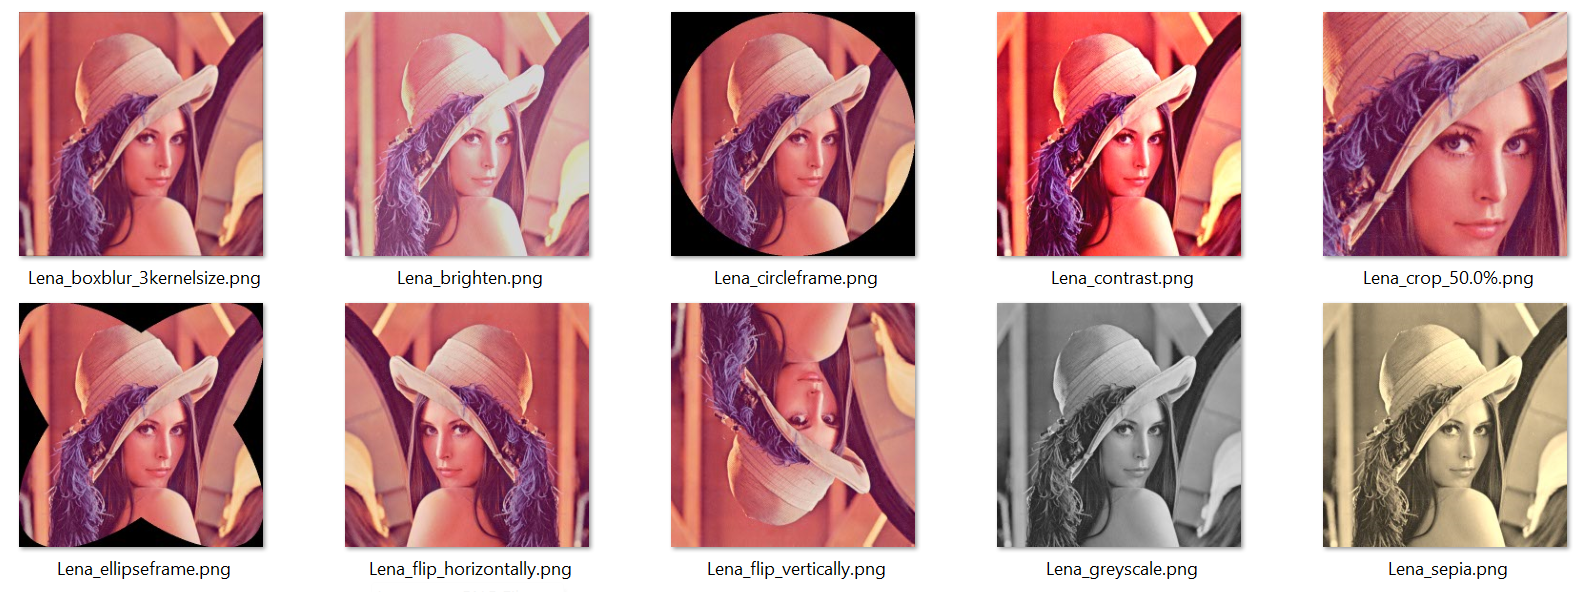

<h3> 9. Nâng cao </h3>

<b> - Hàm EllipseFrame: </b>
Hàm này tạo ra một khung hình elip cho ảnh bằng cách sử dụng mặt nạ. Đầu tiên, hàm tính toán chiều cao, chiều rộng, và tâm của ảnh, sau đó định nghĩa trục nhỏ và trục lớn của elip. Tiếp theo, hàm sử dụng hàm np.ogrid để tạo ra hai mảng tọa độ x và y cho mỗi điểm ảnh trong ảnh.

x_rotated và y_rotated là hai mảng được tính toán bằng cách xoay các tọa độ x và y theo góc quay np.pi / 4 (góc 45 độ). Công thức để xoay một điểm (x, y) quanh gốc tọa độ theo góc quay theta là:

x_rotated = x * cos(theta) - y * sin(theta)
y_rotated = x * sin(theta) + y * cos(theta)

Trong trường hợp này, các điểm ảnh được xoay quanh tâm của ảnh, do đó ta cần trừ đi tọa độ của tâm trước khi xoay. Sau khi xoay xong, ta sử dụng công thức elip để tính toán mặt nạ cho khung hình elip. 

* Hạn chế: chưa tính được chuẩn xác độ dài trục nhỏ và trục lớn của elip để 2 elip nội tiếp hình chữ nhật cùng kích thước với ảnh. 
Code dưới đây là trường hợp dành cho ảnh 512x512 với mask là 2 elip có trục nhỏ là 150 và trục lớn là độ dài của đường chéo hình ảnh - 30

In [ ]:
def EllipseFrame(image_array,FileName):
    start = time.time()
    height, width = image_array.shape[:2]
    center_x, center_y = width // 2, height // 2
    semi_minor_axis = 150
    semi_major_axis = np.sqrt(width ** 2 + height ** 2) / 2 - semi_minor_axis/5
    
    y, x = np.ogrid[:height, :width]
    x_rotated = (x - center_x) * np.cos(np.pi / 4) - (y - center_y) * np.sin(np.pi / 4)
    y_rotated = (x - center_x) * np.sin(np.pi / 4) + (y - center_y) * np.cos(np.pi / 4)

    mask1 = (x_rotated / semi_major_axis) ** 2 + (y_rotated / semi_minor_axis) ** 2 <= 1
    mask2 = (x_rotated / semi_minor_axis) ** 2 + (y_rotated / semi_major_axis) ** 2 <= 1

    mask = mask1 | mask2
    masked_image = np.copy(image_array)
    masked_image[~mask] = (0,0,0)
    end = time.time()
    print("Excution time_Ellipse Frame: ",end-start)
    Output(masked_image, FileName, 'ellipseframe')

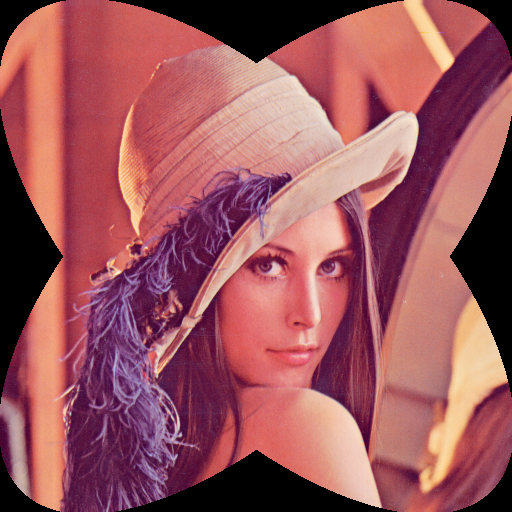

<h2> III. Nguồn tham khảo </h2>
- https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html
- https://e2eml.school/convert_rgb_to_grayscale.html
- https://www.youtube.com/live/8rrHTtUzyZA?feature=share
- https://stackoverflow.com/questions/60357469/increase-brightness-of-specific-pixels-in-an-image-using-python
- https://cvexplained.wordpress.com/2020/04/30/kernels/

<center> HẾT </center>